In [26]:
from time import time

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [27]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [28]:
BATCH_SIZE = 32
IMG_HEIGHT = 64
IMG_WIDTH = 64
EPOCHS = 25
DATASET_VALIDATION_SPLIT = 0.2
DATASET_PATH = "./images/dataset"
MODEL_PATH = "corals_detection_model"

In [29]:
TRAIN_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATASET_PATH,
  validation_split=DATASET_VALIDATION_SPLIT,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

VALIDATION_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATASET_PATH,
  validation_split=DATASET_VALIDATION_SPLIT,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

CLASS_NAMES = TRAIN_DATASET.class_names

Found 4488 files belonging to 2 classes.
Using 3591 files for training.
Found 4488 files belonging to 2 classes.
Using 897 files for validation.


In [30]:
CLASS_NAMES

['bleached_corals', 'healthy_corals']

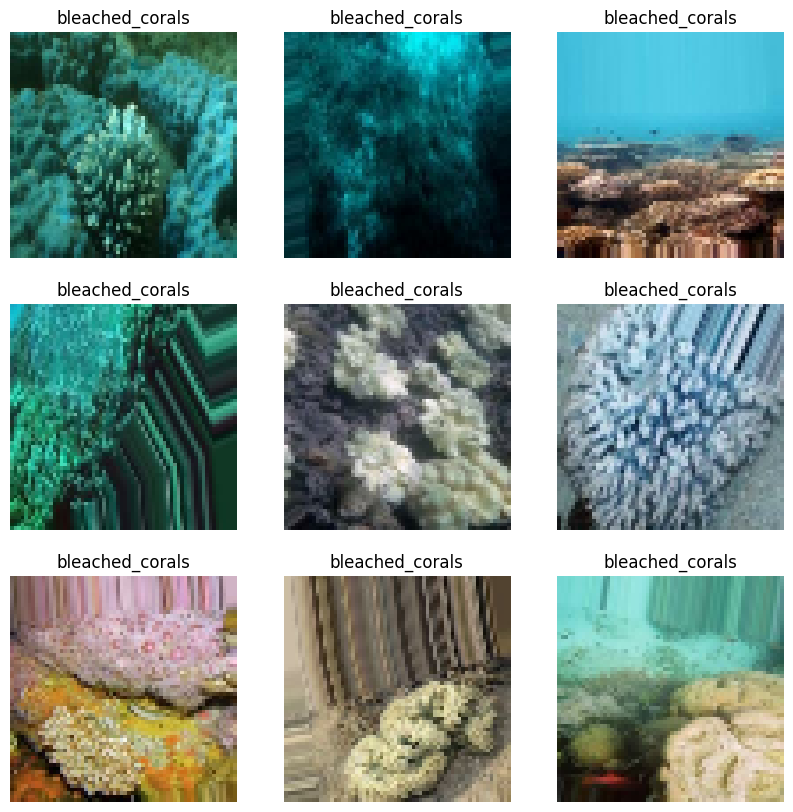

In [31]:
plt.figure(figsize=(10, 10))
for images, labels in TRAIN_DATASET.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASS_NAMES[labels[i]])
    plt.axis("off")

In [48]:
TRAIN_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATASET_PATH,
  validation_split=DATASET_VALIDATION_SPLIT,
  subset="training",
  color_mode="grayscale",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

VALIDATION_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATASET_PATH,
  validation_split=DATASET_VALIDATION_SPLIT,
  subset="validation",
  color_mode="grayscale",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 4488 files belonging to 2 classes.
Using 3591 files for training.
Found 4488 files belonging to 2 classes.
Using 897 files for validation.


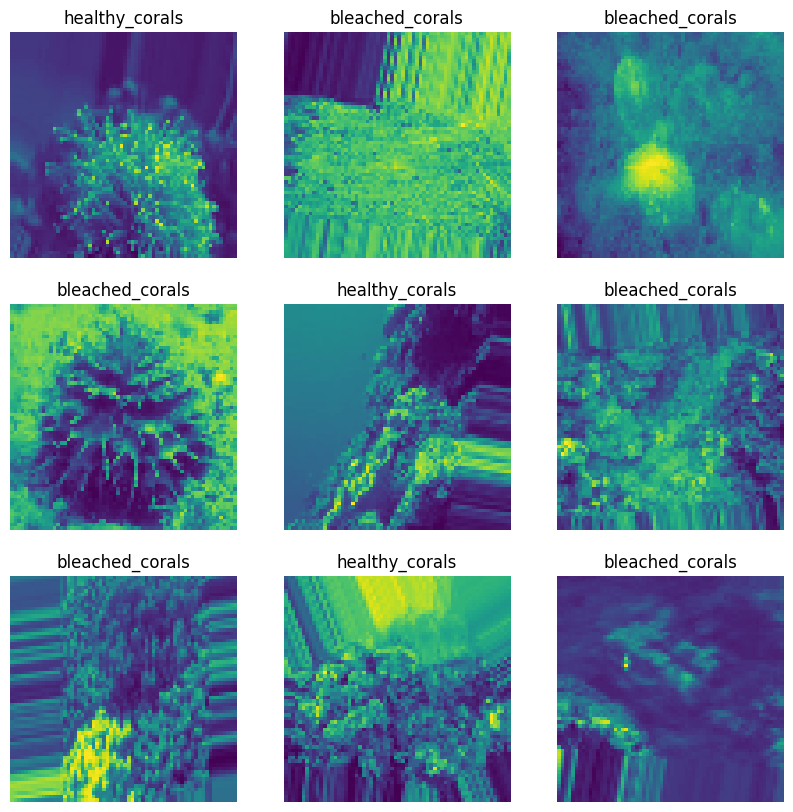

In [52]:
plt.figure(figsize=(10, 10))
for images, labels in TRAIN_DATASET.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASS_NAMES[labels[i]])
    plt.axis("off")

In [50]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(CLASS_NAMES))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)       

In [51]:
start = time()

history = model.fit(
  TRAIN_DATASET,
  validation_data=VALIDATION_DATASET,
  epochs=EPOCHS
)

end = time()

elapsed_time = end - start

final_results = {
  "dataset": "Grayscale",
  "total_parameters": model.count_params(),
  "elapsed_time": elapsed_time,
  "accuracy": history.history["val_accuracy"][-1]
}

Epoch 1/25


113/113 [==============================] - 6s 46ms/step - loss: 0.5071 - accuracy: 0.7736 - val_loss: 0.5376 - val_accuracy: 0.7547
Epoch 2/25
113/113 [==============================] - 5s 44ms/step - loss: 0.4727 - accuracy: 0.7817 - val_loss: 0.4943 - val_accuracy: 0.7525
Epoch 3/25
113/113 [==============================] - 13s 114ms/step - loss: 0.4543 - accuracy: 0.7925 - val_loss: 0.5331 - val_accuracy: 0.7603
Epoch 4/25
113/113 [==============================] - 14s 118ms/step - loss: 0.4296 - accuracy: 0.8012 - val_loss: 0.5008 - val_accuracy: 0.7436
Epoch 5/25
113/113 [==============================] - 13s 117ms/step - loss: 0.4216 - accuracy: 0.8031 - val_loss: 0.4723 - val_accuracy: 0.7770
Epoch 6/25
113/113 [==============================] - 11s 93ms/step - loss: 0.3870 - accuracy: 0.8198 - val_loss: 0.5267 - val_accuracy: 0.7815
Epoch 7/25
113/113 [==============================] - 5s 43ms/step - loss: 0.3608 - accuracy: 0.8301 - val_loss: 0.4844 - val_accuracy: 0.7871
Epo

Results

In [36]:
print(f"Dataset Type: {final_results['dataset']}")
print(f"Total number of parameters: {final_results['total_parameters']}")
print(f"Elapsed Time: {final_results['elapsed_time']:.0f} seconds")
print(f"Final Accuracy: {final_results['accuracy']*100:.2f}%")

Dataset Type: Grayscale
Total number of parameters: 547970
Elapsed Time: 137 seconds
Final Accuracy: 80.60%


In [38]:
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: corals_detection_model\assets


INFO:tensorflow:Assets written to: corals_detection_model\assets


In [39]:
model.save(f"{MODEL_PATH}.h5")

In [40]:
model = tf.keras.models.load_model(MODEL_PATH)

In [41]:
model = tf.keras.models.load_model(f"{MODEL_PATH}.h5")